### 1: 프리미어리그의 승점 예측
- 단순선형회귀

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
# 1. 데이터 로드

In [4]:
with open("./data/premierleague.pkl", "rb") as file:
    datas = pickle.load(file)

df = pd.DataFrame(datas, columns=["name", "gf", "ga", "points"])
df.tail(2)

,name,gf,ga,points
18,Stoke City,35,68,33
19,West Bromwich Albion,31,56,31


In [ ]:
# 2. 데이터 처리
# feature, target 데이터 분리

In [5]:
feature_gf = df[["gf"]]
feature_ga = df[["ga"]]
target = df["points"] # target value

In [ ]:
# 3. 모델링 : 모델학습해서 만들기

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
model_gf = LinearRegression()
model_gf.fit(feature_gf, target)

LinearRegression()

In [ ]:
# 4. 모델 성능 평가 : MSE, RMSE, MAE, MAPE
# MAE

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
pred = np.round(model_gf.predict(feature_gf))

In [11]:
feature_gf.values[:5, 0], pred[:5], target.values[:5]

(array([106, 68, 74, 84, 62], dtype=object),
 array([99., 67., 72., 80., 62.]),
 array([100, 81, 77, 75, 70], dtype=object))

In [12]:
mean_absolute_error(target, pred)

5.5

In [ ]:
# 5. 모델 사용
# Leicester City	56	60	47
# 득점이 60점이였으면 승점이 몇점이였을까?

In [13]:
np.round(model_gf.predict([[60]]))

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.])

In [ ]:
# 6. 시각화

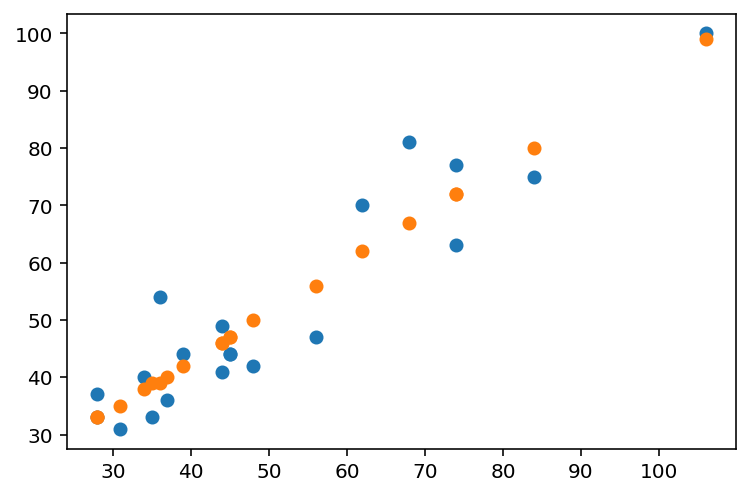

In [14]:
plt.scatter(feature_gf, target) # 파란색
plt.scatter(feature_gf, pred) # 주황색
plt.show()

In [ ]:
# 7. 실점으로 모델 만들기
# feature_ga, target

In [ ]:
# 모델 학습

In [16]:
model_ga = LinearRegression()
model_ga.fit(feature_ga, target)

LinearRegression()

In [ ]:
# 모델 성능 평가

In [17]:
pred = np.round(model_ga.predict(feature_ga))
mean_absolute_error(target, pred) # 득점 MAE : 5.5

8.05

In [ ]:
# 시각화

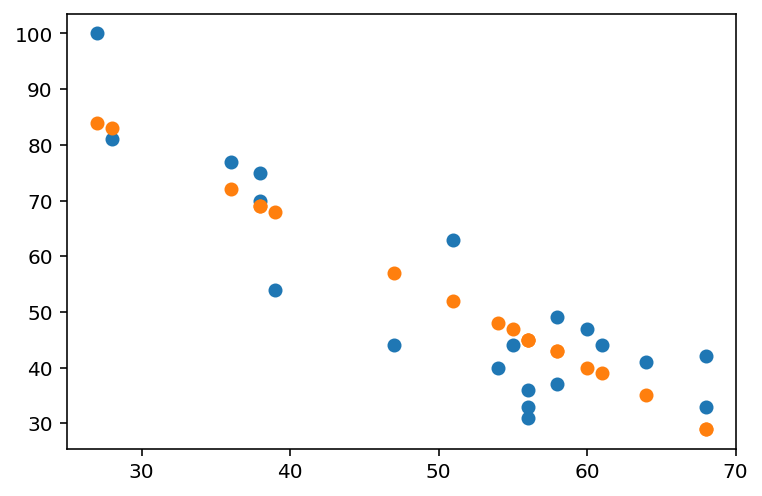

In [18]:
plt.scatter(feature_ga, target) # 파란색
plt.scatter(feature_ga, pred) # 주황색
plt.show()

In [ ]:
# 회귀계수 확인

In [19]:
model_gf.coef_, model_gf.intercept_

(array([0.85195959]), 8.685257008786422)

In [20]:
model_ga.coef_, model_ga.intercept_

(array([-1.33858081]), 120.18376328796805)

In [ ]:
# 다하신분은 두개의 모델성능이 왜 차이가 날까? 를 고민해보세요.
# 승점과의 상관관계까 더 강해서, 상관계수 차이, 해당 변수들의 분포가 동일하지 않아서..

# 데이터 분석에 함에 있어서 어떤 feature가 더 중요한지 생각해볼 필요가 있음!

In [ ]:
# 상관계수출력

In [21]:
for column in ["gf", "ga", "points"]:
    df[column] = df[column].astype("int")

In [22]:
df.dtypes

name      object
gf         int32
ga         int32
points     int32
dtype: object

In [23]:
# 결정계수 : R-squared
np.round(df[["gf", "ga", "points"]].corr() ** 2, 2)

,gf,ga,points
gf,1.00,0.47,0.87
ga,0.47,1.00,0.76
points,0.87,0.76,1.00


In [26]:
model_combined = LinearRegression()

In [28]:
# feature_gf = df.gf
# feature_ga = df.ga
# target = df.points

features = pd.concat([feature_gf, feature_ga], axis=1)
print(features)

     gf  ga
0   106  27
1    68  28
2    74  36
3    84  38
4    62  38
5    74  51
6    36  39
7    44  58
8    56  60
9    39  47
10   45  55
11   45  61
12   48  68
13   44  64
14   34  54
15   28  58
16   37  56
17   28  56
18   35  68
19   31  56


In [29]:
model_combined.fit(features, target)

LinearRegression()

In [30]:
pred_combined = np.round(model_combined.predict(features))
mean_absolute_error(target, pred_combined)

2.9

In [ ]:
# 광고 매출 데이터
# sales를 예측하기 위해서 tv, radio, newpaper 중에 어떤 feature로 모델링하는게 가장 좋을까?

In [25]:
with open("./data/advertising.pkl", "rb") as file:
    datas = pickle.load(file)

df = pd.DataFrame(datas, columns=["tv", "radio", "newspaper", "sales"])
df.tail(2)

,tv,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [43]:
features = df.iloc[:,:-1] # features
target = df.iloc[:, -1] # target value

In [31]:
from sklearn.linear_model import LinearRegression

In [45]:
model_a = LinearRegression()
model_a.fit(features[['tv']], target)

LinearRegression()

In [50]:
from sklearn.metrics import mean_absolute_error

In [52]:
pred = model_a.predict(features[['tv']])
mae = mean_absolute_error(features[['tv']], target)
print('mean_absolute_error =', np.round(mae,2))

mean_absolute_error = 133.03
